# Examples Lecture 1c
## Numerical integration


In [1]:
def trap(func,a,b,n=100):
    """
    Composite trapezoidal rule quadrature
    Input:
        func = name of function to be integrated
        a,b = integration limits
        n = number of segments (default = 100)
    Output:
        I = estimate of integral
    """
    if b <= a: return 'upper bound must be greater than lower bound'
    x = a
    h = (b-a)/n
    s = func(a)
    for i in range(n-1):
        x = x + h
        s = s + 2*func(x)
    s = s + func(b)
    I = (b-a)*s/2/n
    return I

In [7]:
g = 9.81  # m/s2
m = 68.1  # kg
cd = 0.25  # kg/m

import numpy as np

def zint(t):
    return np.sqrt(m*g/cd)*np.tanh(np.sqrt(g*cd/m)*t)

z = trap(zint,0.,3.,5)
print(z)


41.86992959072735


In [8]:
def trap_cumulative(x,y):
    """
    trapezoidal rule for unequally spaced data
    returns an array of cumulative sums
    Input:
        x = array of independent variable values
        y = array of dependent variable values
        x and y arrays must be of equal length
            and in ascending order of x
    Output:
        s = array of sums
    """
    n = len(x)
    if len(y) != n: return 'x and y arrays must be of equal length'
    for i in range(n-1):
        if x[i+1] < x[i]: return 'x array not in ascending order'
    s = np.zeros((n))
    for k in range(1,n):
        s[k] = s[k-1] + (x[k]-x[k-1])*(y[k]+y[k-1])/2
    return s


In [9]:
import numpy as np

r = np.array([0., 1100., 1500., 2450., 3400., 3630.,
              4500., 5380., 6060., 6280., 6380.])
rho = np.array([13., 12.4, 12.,11.2, 9.7, 5.7,
                5.2, 4.7, 3.6, 3.4, 3.])
n = len(r)
rho2 = rho*1000.  # convert density to kg/m3
r2 = r*1000.  # convert radius to m

mint = 4.*np.pi*r2**2*rho2

m = trap_cumulative(r2,mint)
mt = m/1000.  # convert to tonnes
print('mass of the earth = {0:8.4e} tonnes'.format(mt[n-1]))

vol = 4./3.*np.pi*(r[n-1]*1000.)**3  # cubic meters
den = m[n-1]/vol  # kg/m3
print('average density = {0:7.2f} kg/m3'.format(den))


mass of the earth = 6.1087e+21 tonnes
average density = 5615.59 kg/m3


In [10]:
def trapuneq(x,y):
    """
    trapezoidal rule for unequally spaced data
    returns an array of cumulative sums
    Input:
        x = array of independent variable values
        y = array of dependent variable values
        x and y arrays must be of equal length
            and in ascending order of x
    Output:
        s = array of sums
    """
    n = len(x)
    if len(y) != n: return 'x and y arrays must be of equal length'
    for i in range(n-1):
        if x[i+1] < x[i]: return 'x array not in ascending order'
    s = 0
    for k in range(0,n-1):
        s = s + (x[k+1]-x[k])*(y[k+1]+y[k])/2
    return s



In [11]:
import numpy as np

r = np.array([0., 0.12, 0.24, 0.36, 0.49, 0.62, 0.79, 0.86, 0.93, 1.])
rho = np.array([6., 5.81, 5.14, 4.29, 3.39, 2.7, 2.19, 2.1, 2.04, 2.])
r = r / 10.
mint = 4.*np.pi*r**2*rho

m = trapuneq(r,mint)
print('mass estimate = {0:6.4f} g'.format(m))

vol = 4./3./np.pi*(1./10.)**3
den = m/vol
print('average density = {0:6.2f} g/cm3'.format(den))

mass estimate = 0.0106 g
average density =  24.95 g/cm3


In [13]:
def romberg(func,a,b,es=1.e-8,maxit=30):
    """
    Romberg integration quadrature
    input:
        func = name of function to be integrated
        a, b = integration limits
        es = desired relative error (default = 1.e-8)
        maxit = iteration limit (defaul = 30)
    output:
        q = integral estimate
        ea = approximate relative error achieved
        iter = iterations taken
    """
    n = 1
    I = np.zeros((2*maxit,maxit+1))
    I[0,0] = trap(func,a,b,n)
    for iter in range(1,maxit+1):
        n = 2**iter
        I[iter,0] = trap(func,a,b,n)
        for k in range(1,iter+1):
            j = iter-k
            I[j,k] = (4**(k)*I[j+1,k-1] - I[j,k-1])/(4**(k)-1)
        ea = abs((I[0,iter]-I[1,iter-1])/I[0,iter])
        if ea <= es: break
    q = I[0,iter]
    return q,ea,iter


In [14]:
T = 1.

def f(t):
    if t <= T/2:
        i = 8.*np.exp(-t/T)*np.sin(2.*np.pi*t/T)
    else:
        i = 0
    return  i**2

I2val,errel,iter = romberg(f,0.,T,es=0.001)
print(I2val)
print(errel)
print(iter)

Irms = np.sqrt(1/T*I2val)
print('Irms =',Irms)


9.866493732072486
8.943569329045662e-05
4
Irms = 3.1410975362240006


# Simpson
Simpson’s 1/3 rule is more accurate than trapezoidal because it fits parabolas rather than straight lines, and requires an even number of subintervals.

In [2]:
import numpy as np

def simpson13(f, a, b, n):
    """
    Simpson's 1/3 Rule for numerical integration.
    f : function to integrate
    a, b : limits of integration
    n : number of subintervals (must be even)
    """
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's 1/3 rule")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    
    # Sum odd-indexed terms
    odd_sum = np.sum(f(x[1:-1:2]))
    # Sum even-indexed terms
    even_sum = np.sum(f(x[2:-1:2]))

    return (h/3) * (f(a) + 4*odd_sum + 2*even_sum + f(b))


In [3]:
# Example function
f = np.sin

a = 0
b = np.pi
n = 10  # must be even

approx = simpson13(f, a, b, n)
exact = 2.0

print("Simpson 1/3 result:", approx)
print("Exact value       :", exact)
print("Error             :", abs(approx - exact))


Simpson 1/3 result: 2.0001095173150043
Exact value       : 2.0
Error             : 0.00010951731500430384


## Simpsons' 3/8 rule
Simpson’s 1/3 rule uses parabolas over 2 intervals; Simpson’s 3/8 rule uses cubic polynomials over 3 intervals.

| Rule        | Subinterval requirement | Order    | Best when                        |
| ----------- | ----------------------- | -------- | -------------------------------- |
| Simpson 1/3 | (n) even                | (O(h^4)) | General use                      |
| Simpson 3/8 | (n) multiple of 3       | (O(h^4)) | When number of panels = 3, 6, 9… |


In [4]:
import numpy as np

def simpson38(f, a, b, n):
    """
    Simpson's 3/8 Rule (composite).
    f : function to integrate
    a, b : integration limits
    n : number of subintervals (must be a multiple of 3)
    """
    if n % 3 != 0:
        raise ValueError("n must be a multiple of 3 for Simpson's 3/8 rule.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    sum3 = np.sum(f(x[1:n:3])) + np.sum(f(x[2:n:3]))  # coefficients 3
    sum2 = np.sum(f(x[3:n:3]))                       # coefficients 2

    return (3*h/8) * (f(a) + 3*sum3 + 2*sum2 + f(b))


In [5]:
# Example function
f = np.sin

a = 0
b = np.pi
n = 12  # must be multiple of 3

approx = simpson38(f, a, b, n)
exact = 2.0

print("Simpson 3/8 result:", approx)
print("Exact value       :", exact)
print("Error             :", abs(approx - exact))


Simpson 3/8 result: 2.000119386415226
Exact value       : 2.0
Error             : 0.0001193864152257973


# Romberg's integration
Romberg starts with the trapezoidal rule, refines the step size, and uses Richardson extrapolation to systematically remove error terms, achieving extremely high accuracy.

| Method      | Base idea                            | Accuracy       | Notes                                    |
| ----------- | ------------------------------------ | -------------- | ---------------------------------------- |
| Trapezoidal | Straight lines                       | O(h²)          | Simple but low accuracy                  |
| Simpson     | Parabolic fits                       | O(h⁴)          | Better but requires even intervals       |
| Romberg     | Repeated trapezoidal + extrapolation | O(h⁸), O(h¹⁶)… | Very high accuracy, minimal extra effort |


In [6]:
import numpy as np

def f(x):
    return np.sin(x)

def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    return h * (0.5*f(x[0]) + np.sum(f(x[1:-1])) + 0.5*f(x[-1]))

def romberg(f, a, b, max_k=5):
    R = np.zeros((max_k, max_k))
    
    # First column: trapezoidal rule with refined h
    for k in range(max_k):
        n = 2**k  # number of trapezoids
        R[k,0] = trapezoid(f, a, b, n)
    
    # Extrapolate
    for j in range(1, max_k):
        for k in range(j, max_k):
            R[k,j] = (4**j * R[k,j-1] - R[k-1,j-1]) / (4**j - 1)
    
    return R

R = romberg(f, 0, np.pi)
np.set_printoptions(linewidth=200)
print(np.array2string(R, max_line_width=200))


[[1.92367069e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.57079633e+00 2.09439510e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.89611890e+00 2.00455975e+00 1.99857073e+00 0.00000000e+00 0.00000000e+00]
 [1.97423160e+00 2.00026917e+00 1.99998313e+00 2.00000555e+00 0.00000000e+00]
 [1.99357034e+00 2.00001659e+00 1.99999975e+00 2.00000002e+00 1.99999999e+00]]


## Example Traveltime
Consider a simple 1D Earth model with velocity increasing linearly with depth:

##  Physical Setup: Vertical Travel Time in a Velocity Gradient

We consider a simple 1D Earth model where the velocity increases linearly with depth:

[
v(z) = v_0 + k z
]

with:

* ( v_0 = 1500\ \text{m/s} ) — near-surface velocity
* ( k = 0.6\ \text{(m/s)/m} ) — vertical velocity gradient
* Depth interval: ( z \in [0, 2000]\ \text{m} )

---

### Objective

Compute the **one-way vertical travel time**:

[
T = \int_{0}^{2000} \frac{1}{v(z)}, dz
= \int_{0}^{2000} \frac{1}{1500 + 0.6z}, dz
]

This integral gives the total time it takes for a seismic wave to travel vertically from the surface to 2 km depth.

---

### Analytical Solution (for reference)

The integral:

[
\int_0^{Z} \frac{1}{v_0 + kz}, dz
]

has a closed-form solution:

[
T(Z) = \frac{1}{k},\ln\left(\frac{v_0 + kZ}{v_0}\right)
]

For the parameters above and ( Z = 2000\ \text{m} ), this value will be used as the **exact travel time** to compare errors in numerical integration methods.

---

### Why This Example?

This travel-time computation is common in geophysics:

* Ray tracing
* Interval velocity analysis
* Time-to-depth conversion
* Building initial models for migration and inversion

It also provides a **smooth integrand**, ideal for comparing numerical methods like:

* Trapezoidal rule
* Simpson’s 1/3 rule
* Romberg integration



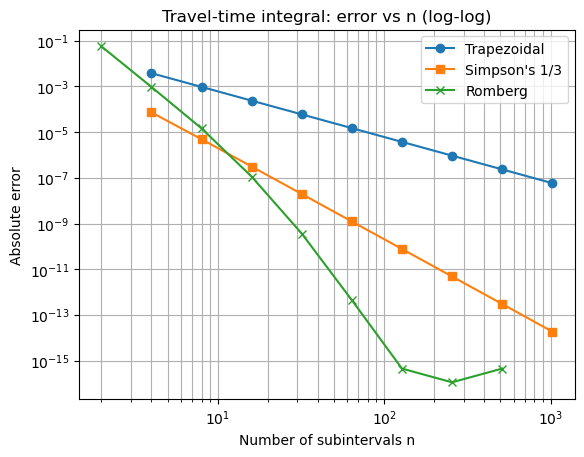

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Physical model: velocity and slowness
# -----------------------------
v0 = 1500.0     # m/s
k = 0.6         # (m/s)/m

def v(z):
    return v0 + k*z

def dt_dz(z):
    """Integrand: vertical slowness dt/dz = 1/v(z)."""
    return 1.0 / v(z)

def exact_travel_time(zmax):
    """Analytical solution of ∫ 0^zmax dz / (v0 + k z)."""
    return (1.0 / k) * np.log((v0 + k*zmax) / v0)

# Integration interval
a = 0.0
b = 2000.0
T_exact = exact_travel_time(b)

# -----------------------------
# Numerical integration methods
# -----------------------------
def trapezoid(f, a, b, n):
    """Composite trapezoidal rule."""
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h * (0.5*f(x[0]) + np.sum(f(x[1:-1])) + 0.5*f(x[-1]))

def simpson13(f, a, b, n):
    """Composite Simpson's 1/3 rule (n must be even)."""
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's 1/3 rule")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    odd_sum = np.sum(f(x[1:-1:2]))   # i = 1,3,5,...,n-1
    even_sum = np.sum(f(x[2:-1:2]))  # i = 2,4,6,...,n-2

    return (h/3) * (f(a) + 4*odd_sum + 2*even_sum + f(b))

def romberg(f, a, b, max_k):
    """
    Romberg integration based on trapezoidal rule.
    max_k: number of refinement levels (rows in Romberg table).
    Returns the full Romberg table.
    """
    R = np.zeros((max_k, max_k))

    # First column: trapezoidal with n = 1, 2, 4, 8, ...
    for k_level in range(max_k):
        n = 2**k_level
        R[k_level, 0] = trapezoid(f, a, b, n)

    # Richardson extrapolation
    for j in range(1, max_k):
        for k_level in range(j, max_k):
            R[k_level, j] = (4**j * R[k_level, j-1] - R[k_level-1, j-1]) / (4**j - 1)

    return R

# -----------------------------
# Build error vs n for the methods
# -----------------------------

# Use powers of 2 for n (so Romberg matches naturally)
k_vals = np.arange(2, 11)   # gives n = 4, 8, 16, ..., 1024
n_vals = 2**k_vals

trap_errors = []
simp_errors = []

for n in n_vals:
    T_trap = trapezoid(dt_dz, a, b, n)
    T_simp = simpson13(dt_dz, a, b, n)  # n is even here
    trap_errors.append(abs(T_trap - T_exact))
    simp_errors.append(abs(T_simp - T_exact))

# Romberg: for each max_k, take the most accurate entry R[max_k-1, max_k-1]
romb_errors = []
romb_n_vals = 2**np.arange(1, len(n_vals)+1)  # n = 2,4,8,...,1024

for max_k in range(1, len(n_vals)+1):
    R = romberg(dt_dz, a, b, max_k)
    T_romb = R[max_k-1, max_k-1]
    romb_errors.append(abs(T_romb - T_exact))

# -----------------------------
# Plot on log-log scale
# -----------------------------
plt.figure()

plt.loglog(n_vals, trap_errors, 'o-', label='Trapezoidal')
plt.loglog(n_vals, simp_errors, 's-', label="Simpson's 1/3")
plt.loglog(romb_n_vals, romb_errors, 'x-', label='Romberg')

plt.xlabel('Number of subintervals n')
plt.ylabel('Absolute error')
plt.title('Travel-time integral: error vs n (log-log)')
plt.grid(True, which='both')
plt.legend()
plt.show()


# Gauss Quadrature

In [1]:
# Use Gauss quadrature (2 and 3 point) to estimate the integral of f(x) = 5*sin(0.5*pi*t) from 0 to 2.
import numpy as np

def f(t):
    return 5 * np.sin(0.5 * np.pi * t)

def gauss_legendre_2pt(func, a, b):
    nodes = np.array([-1 / np.sqrt(3), 1 / np.sqrt(3)])
    weights = np.array([1.0, 1.0])
    mapped = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    return 0.5 * (b - a) * np.sum(weights * func(mapped))

def gauss_legendre_3pt(func, a, b):
    nodes = np.array([0.0, -np.sqrt(3/5), np.sqrt(3/5)])
    weights = np.array([8/9, 5/9, 5/9])
    mapped = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    return 0.5 * (b - a) * np.sum(weights * func(mapped))

a, b = 0.0, 2.0
exact = 20 / np.pi

approx_2pt = gauss_legendre_2pt(f, a, b)
approx_3pt = gauss_legendre_3pt(f, a, b)

print(f"2-point Gauss-Legendre: {approx_2pt:.6f}")
print(f"3-point Gauss-Legendre: {approx_3pt:.6f}")
print(f"Exact analytic integral: {exact:.6f}")


2-point Gauss-Legendre: 6.161905
3-point Gauss-Legendre: 6.370619
Exact analytic integral: 6.366198
